AKA T1

In [1]:
import re

In [2]:
# this should be done before cleaning links
def remove_tags(text):
    text = text.replace('#todo', '')
    text = text.replace('#write_proof', '')
    words = [word for word in text.split() if not word.startswith('https')]
    return ' '.join(words)

In [3]:
#this should be done after removing tags.
def remove_aliases(text=''):
    start_indices = [match.start() for match in re.finditer('---', text)]
    i = 0
    while i < len(start_indices):
        next_line = text.find('---', start_indices[i] + 4)
        text = text.replace(text[start_indices[i]:next_line +3], (next_line +3 - start_indices[i])* '#')
        i = i + 2
    text = text.replace('#', '')
    return text
        

In [4]:
# cleans up in-text aliases and also removes octothorpes and residual brackets
# should be done after removing tags
def clean_links(text):
    start_indices = [match.start() for match in re.finditer('\[\[', text)]
    
    for index in start_indices:
        if text[index - 1] == '!':
            close_index = text.find(']', index)
            text = text.replace(text[index - 1:close_index + 3], (close_index + 3 - index)*'#')
        else:
            next_pipe = text.find('|', index)
            close_index = text.find(']', index)
            if next_pipe != -1:
                if next_pipe - close_index < 0:
                    text = text.replace(text[index:next_pipe + 1], (next_pipe - index + 1)*'#')
    text = text.replace('#', '')
    text = text.replace('[', '')
    text = text.replace(']', '')
    return text

In [5]:
def remove_simples(text):
    text = text.replace('$$', '$')
    text = text.replace('.$', '$.')
    text = text.replace('$', ' $ ')
    text = text.replace('**', ' ')
    text = text.replace('-', ' - ')
    return text

In [6]:
# do this before prepping spaces and removing tex
def remove_environments(text):
    start_indices = [match.start() for match in re.finditer('begin', text)]
    i = 0
    while i < len(start_indices):
        end_index = text.find('\end', start_indices[i] + 5)
        end_end = text.find('}', end_index)
        text = text.replace(text[start_indices[i]:end_end], (end_end - start_indices[i])* '#')
        i = i + 1
    text = text.replace('#', '')
    return text

In [7]:
def prep_w_spaces(text):
    text = text.replace('\\\\', ' \\')
    text = text.replace('(', '(')
    text = text.replace(')', ')')
    text = text.replace('\{', '{')
    text = text.replace('\}', ' } ') 
    text = text.replace(',', ', ')
    return text

In [8]:
#change lists to (i) format

def list_fix(text):
    text = text.replace('1.', '(i)')
    text = text.replace('2.', '(ii)')
    text = text.replace('3.', '(iii)')
    text = text.replace('4.', '(iv)')
    text = text.replace('5.', '(v)')
    text = text.replace('6.', '(vi)')
    text = text.replace('7.', '(vii)')
    text = text.replace('8.', '(viii)')
    text = text.replace('9.', '(ix)')
    text = text.replace('10.', '(x)')

    return text

In [9]:
# do this after removing all #s, i.e. last
# old
def remove_unreadable_tex(text):
    #fonts
    text = text.replace('\\mathbb', '')
    text = text.replace('\\text', '')
    text = text.replace('\\mathcal', '')
    text = text.replace('\\mathfrak', '')
    text = text.replace('\\mathbf', '')

    #greek letters
    text = text.replace('\\alpha', 'α')
    text = text.replace('\\beta', 'β')
    text = text.replace('\\gamma', 'γ')
    text = text.replace('\\Gamma', 'Γ')
    text = text.replace('\\delta', 'δ')
    text = text.replace('\\Delta', 'Δ')
    text = text.replace('\\epsilon', 'ε')
    text = text.replace('\\varepsilon', 'ε')
    text = text.replace('\\zeta', 'ζ')
    text = text.replace('\\eta', 'η')
    text = text.replace('\\theta', 'θ')
    text = text.replace('\\Theta', 'Θ')
    text = text.replace('\\iota', 'ι')
    text = text.replace('\\kappa', 'κ')
    text = text.replace('\\lambda', 'λ')
    text = text.replace('\\Lambda', 'Λ')
    text = text.replace('\\mu', 'μ')
    text = text.replace('\\nu', 'ν')
    text = text.replace('\\chi', 'χ')
    text = text.replace('\\omicron', 'ο')
    text = text.replace('\\pi', 'π')
    text = text.replace('\\Pi', 'Π')
    text = text.replace('\\rho', 'ρ')
    text = text.replace('\\sigma', 'σ')
    text = text.replace('\\Sigma', 'Σ')
    text = text.replace('\\tau', 'τ')
    text = text.replace('\\upsilon', 'υ')
    text = text.replace('\\psi', 'ψ')
    text = text.replace('\\Psi', 'Ψ')
    text = text.replace('\\phi', 'φ')
    text = text.replace('\\varphi', 'φ')
    text = text.replace('\\Phi', 'Φ')
    text = text.replace('\\xi', 'ξ')
    text = text.replace('\\omega', 'ω')
    text = text.replace('\\Omega', 'Ω')

    #other replacements
    text = text.replace('\\dots', '...')
    text = text.replace('\\cdots', '···')
    text = text.replace('\\leq', ' less than or equal to ')
    text = text.replace('\\geq', ' greater than or equal to ')
    text = text.replace('\\mid', ' such that ')
    text = text.replace('\\partial', '∂')
    text = text.replace('\\circ', ' composed with ')
    text = text.replace('\\cap', ' intersected with ')
    text = text.replace('\\setminus', '\\')
    text = text.replace('\\sim', '~')
    text = text.replace('\\int', '∫')
    text = text.replace('\\infty', '∞')
    text = text.replace('\\ell', 'l')
    text = text.replace('\\mapsto', ' maps to')
    text = text.replace('\\cup', ' union with ')
    text = text.replace('\\bigcup', ' union of ')
    text = text.replace('\\bigcaup', ' intersection of ')
    text = text.replace('\\neq', '≠')
    text = text.replace('\\cdot', '·')
    text = text.replace('\\sqrt', '√')
    text = text.replace('\\sharp', '#')
    text = text.replace('\\supseteq', ' a superset of ')
    text = text.replace('\\supset', ' a superset of ')
    text = text.replace('\\subseteq', ' a subset of ')
    text = text.replace('\\subset', ' a subset of ')
    text = text.replace('\\cong', ' = ')
    text = text.replace('\\simeq', ' = ' )
    text = text.replace('=', ' = ' )
    text = text.replace('\\langle', '«')
    text = text.replace('\\rangle', '»')
    text = text.replace('\\oplus', ' + ')
    text = text.replace('\\times', ' times ')
    text = text.replace('\\prod', ' product over ')
    text = text.replace('\\equiv', ' ≈ ')
    text = text.replace('\\emptyset', ' ø ')
    text = text.replace('\\exists', ' there exists ')
    text = text.replace('\\forall', ' for all ')
    text = text.replace('\\quad', ' \t ')
    text = text.replace('&=', '= ')
    text = text.replace('\\in', ' in ')
    text = text.replace('\\to', ' to ')
    text = text.replace(':', ': ')
    
    
    #removals
    text = text.replace('\\left', '')
    text = text.replace('\\right', '')
    text = text.replace('\\overline', '')
    text = text.replace('\\underline', '')

    #fractions
    text = text.replace('\\frac', '')
    text = text.replace('\}\{', '/')

    return text

    

In [10]:
def final_sweep(text):
    words = [word.replace('\\', '') for word in text.split() if not word.startswith('Helvetica')]
    text = ' '.join(words)
    return text

In [11]:
def clean_everything(text):
    text = remove_tags(text) #done first
    text = clean_links(text)
    text = remove_aliases(text)
    text = remove_environments(text)

    #text = remove_unreadable_tex(text)

    text = remove_simples(text)
    #text = prep_w_spaces(text)

    text = list_fix(text)

    text = final_sweep(text)
    return text
    

In [12]:
# running this thing on every file in definitions and then adding the conll 
# to a text file one at a time...

import os
import spacy

from spacy_conll import init_parser

nlp = init_parser("en_core_web_sm", 'spacy')
from spacy.language import Language
@Language.component('detextor')
def detextor(doc):
    dollar_indices = [index for index, token in enumerate(doc) if token.text == '$']
    while len(dollar_indices) > 1:
        with doc.retokenize() as retokenizer:
            retokenizer.merge(doc[dollar_indices[0]:dollar_indices[1] + 1])
        dollar_indices = [index for index, token in enumerate(doc) if token.text == '$']
    return doc
#nlp.remove_pipe('detextor') #might need to add this back in if you run this block more than once
nlp.add_pipe('detextor', after='tagger')


            

<function __main__.detextor(doc)>

In [17]:
# for definitions

definitions = '/Users/lucyhorowitz/Library/Mobile Documents/iCloud~md~obsidian/Documents/MathRepository/notes/definitions'
i = 1
sent_lengths = []
for filepath in os.listdir(definitions):
    defn = os.path.join(definitions, filepath)
    defn_text = open(defn).read()

    with open('defs-hyph.conllu', 'a') as f:
        defn_text = clean_everything(defn_text)
        doc = nlp(defn_text)
        sents = [sent for sent in doc.sents]
        head_tail = os.path.split(defn)

        # print tail part of the path
        f.write('# defn_title = ' + head_tail[1] + '\n')
        j = 1
        for sent in doc.sents:
            doc2 = nlp(sent.text)
            conll = doc2._.conll_str
            sent_lengths.append(len(doc2))
            f.write('# sent_id = ' + str(j) + '\n')
            f.write('# sent_len = ' + str(len(doc2)) + '\n')
            f.write('# text = ' + sent.text + '\n')
            f.write(conll + '\n')
            j = j + 1
    i = i + 1

In [3]:
# get list of definition names
import os
definitions = '/Users/lucyhorowitz/Library/Mobile Documents/iCloud~md~obsidian/Documents/MathRepository/notes/definitions'
for filepath in os.listdir(definitions):
    with open('defs.txt', 'a') as f:
        defn = os.path.join(definitions, filepath)
        head_tail = os.path.split(defn)
        f.write(head_tail[1][:-3] + '\n')


In [14]:
text = open('/Users/lucyhorowitz/Documents/spaCy-Obsidian project/PilotTest100.txt','r').read()
sent_lengths = []
with open('defs-hyph.conllu', 'a') as f:
        text = clean_everything(text)
        doc = nlp(text)
        sents = [sent for sent in doc.sents]

        j = 1
        for sent in doc.sents:
            doc2 = nlp(sent.text)
            conll = doc2._.conll_str
            sent_lengths.append(len(doc2))
            f.write('# sent_id = ' + str(j) + '\n')
            f.write('# sent_len = ' + str(len(doc2)) + '\n')
            f.write('# text = ' + sent.text + '\n')
            f.write(conll + '\n')
            j = j + 1

In [15]:
import statistics

print('Median sentence length: ' + str(statistics.median(sent_lengths)))
print('Mean sentence length: ' + str(statistics.mean(sent_lengths)))
print('Standard deviation of sentence length: ' + str(statistics.stdev(sent_lengths)))

Median sentence length: 19
Mean sentence length: 22.672423719055843
Standard deviation of sentence length: 16.497636492783094


(0.0, 100.0)

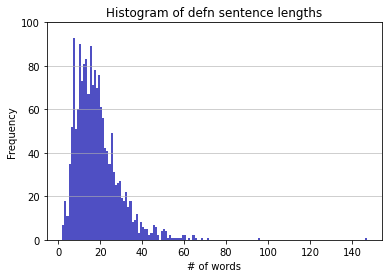

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=sent_lengths, bins=np.arange(min(sent_lengths), max(sent_lengths) + 1, 1), color='#0504aa',
                            alpha=0.7, rwidth=3)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('# of words')
plt.ylabel('Frequency')
plt.title('Histogram of defn sentence lengths')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [17]:
from collections import OrderedDict
from operator import itemgetter
text = clean_everything(open("Definitions.rtf").read())
words = [word for word in text.split() if word.lower() not in nlp.Defaults.stop_words]

mega_doc = nlp(' '.join(words))

counting_dict = mega_doc.count_by(spacy.attrs.IDS['LEMMA'])

ordered = OrderedDict(sorted(counting_dict.items(), key = itemgetter(1), reverse=True))

for lemma, count in ordered.items():
     human_readable_tag = mega_doc.vocab[lemma].text
     print(human_readable_tag, count)

/ 1093
, 1017
. 980
) 747
//www.wikidata.org 528
wiki 528
= 494
x 413
( 380
let 373
- 366
space 320
group 303
: 300
X 280
set 252
subset 250
G 221
f 207
} 203
v 183
g 174
function 160
b 155
n 152
0 128
topological 125
1 120
r 119
p 114
element 114
map 111
vector 107
R 106
exist 103
F 102
open 100
M 98
y 97
give 90
u 86
algebra 86
ring 84
+ 81
a 81
· 79
V 77
linear 76
lie 76
matrix 75
define 71
point 68
homomorphism 66
C 65
subgroup 64
; 63
Let 63
product 62
c 62
measure 61
U 60
Y 60
S 60
object 59
continuous 59
be 58
r^n 57
complex 57
B 56
call 55
2 55
union 54
identity 52
N 52
category 51
m 51
h 51
denote 50
morphism 49
measurable 46
e 46
definition 46
G. 46
follow 45
finite 45
operation 45
T 45
quotient 45
sequence 44
ideal 44
contain 43
form 43
representation 43
H 43
transformation 43
W 43
t 41
I 40
diagram 40
generate 39
chain 39
< 39
compose 39
R^n 38
L 38
close 37
X. 37
" 37
equivalence 37
write 36
class 36
d 36
inverse 36
field 35
3 35
collection 35
metric 34
_ 34
sum 34
module 

In [2]:
with open("defs-terms.txt","a") as termslist:
    ans = open("/Users/lucyhorowitz/Documents/spaCy-Obsidian project/chicago defs/defs-ans.txt","r").readlines()
    comps = open("/Users/lucyhorowitz/Documents/spaCy-Obsidian project/chicago defs/defs-compounds.txt","r").readlines()
    nouns = open("/Users/lucyhorowitz/Documents/spaCy-Obsidian project/chicago defs/defs-nouns.txt","r").readlines()

    terms = []
    for an in ans:
        terms.append(an[:an.index(":")])
    for comp in comps:
        terms.append(comp[:comp.index(":")].strip())
    for noun in nouns:
        terms.append(noun[:noun.index(":")])
    
    terms2 = sorted(terms)
    for term in terms2:
        termslist.write(term + "\n")